#RESOLVING IMPORTS


In [1]:
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#IMPORTING IMAGE

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


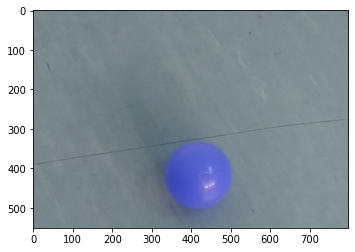

In [3]:
image = cv2.imread('drive/MyDrive/WMA/ball.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  #changing to HSV
plt.imshow(image)
plt.show()

#MASK

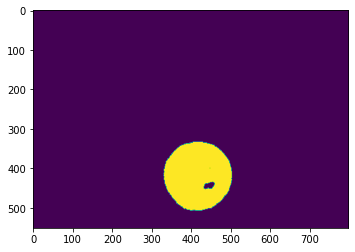

In [4]:
# defining range of colour red in hsv (needs two masks)
lower1 = np.array([0,100,20])
higher1 = np.array([10,255,255])

lower2 = np.array([160,100,20])
higher2 = np.array([179,255,255])

#treshhold for red colour only
mask1 = cv2.inRange(hsv,lower1,higher1)
mask2 = cv2.inRange(hsv,lower2,higher2)

full_mask = mask1 + mask2


plt.imshow(full_mask)
plt.show()

# morphologies

(551, 799)


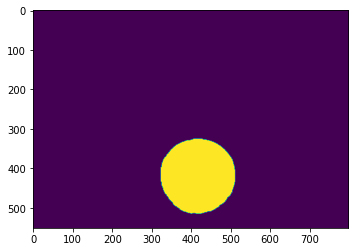

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) 
opening = cv2.morphologyEx(full_mask, cv2.MORPH_OPEN, kernel) #opening to get rid of rough edges
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) #closing to get rid of dots in the middle
dilation = cv2.dilate(closing,kernel,iterations = 4)

print(dilation.shape)
plt.imshow(dilation)
plt.show()

#middle of an object

(551, 799, 3)


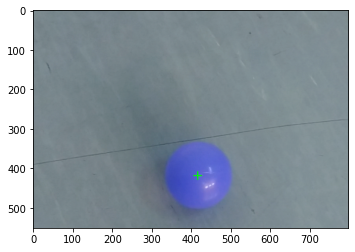

In [6]:
contours, hierarchy = cv2.findContours(dilation,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #here i find all contours
largest_contour = max(contours, key=cv2.contourArea) #here i find the largest one

M = cv2.moments(largest_contour) #getting moments. Using exact same method should actually apply to any homogoneously red element

cx = int(M['m10']/M['m00']) #x of a centroid
cy = int(M['m01']/M['m00']) #y of a centroid

thickness = 2
color = (0, 255, 0) # BGR color code for red

#here we draw an x in the middle 
cv2.line(image, (cx-10, cy), (cx+10, cy), color, thickness)
cv2.line(image, (cx, cy-10), (cx, cy+10), color, thickness)

print(image.shape)
plt.imshow(image)
plt.show()

# loop for video

In [20]:
cap = cv2.VideoCapture("drive/MyDrive/WMA/movingball.mp4")

# Get video dimensions
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/drive/My Drive/output_videos/ballOut.mp4', fourcc, 30, (width,height))

while(cap.isOpened()):
  ret, frame = cap.read()
  if ret==True:
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask1 = cv2.inRange(hsv,lower1,higher1)
    mask2 = cv2.inRange(hsv,lower2,higher2)
    hsv_mask = mask1 + mask2
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) 
    hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_OPEN, kernel) #opening to get rid of rough edges
    hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_CLOSE, kernel) #closing to get rid of dots in the middle
    hsv_mask = cv2.dilate(hsv_mask,kernel,iterations = 4)

    contours, hierarchy = cv2.findContours(hsv_mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #here i find all contours
    largest_contour = max(contours, key=cv2.contourArea) #here i find the largest one

    M = cv2.moments(largest_contour) #getting moments. Using exact same method should actually apply to any homogoneously red element

    cx = int(M['m10']/M['m00']) #x of a centroid
    cy = int(M['m01']/M['m00']) #y of a centroid

    thickness = 2
    color = (0, 255, 0)

    #here we draw an x in the middle 
    cv2.line(frame, (cx-10, cy), (cx+10, cy), color, thickness)
    cv2.line(frame, (cx, cy-10), (cx, cy+10), color, thickness)

    out.write(frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
  else:
    break

cap.release()
out.release()

KeyboardInterrupt: ignored

# wallet tracking


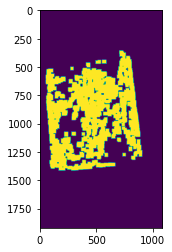

In [29]:
cap = cv2.VideoCapture("drive/MyDrive/WMA/wallet.mp4")

# Get video dimensions
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/drive/My Drive/output_videos/walletOut.mp4', fourcc, 30, (width,height))

while(cap.isOpened()):
  ret, frame = cap.read()
  if ret==True:
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    black_low= np.array([0,0,0])
    black_high= np.array([300,0,100])
    hsv_mask = cv2.inRange(hsv,black_low,black_high)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)) 
    hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_GRADIENT, kernel) #gradient to fill
    hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_GRADIENT, kernel) #gradient to fill
    hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_GRADIENT, kernel) #gradient to fill
    hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_CLOSE, kernel) #closing to get rid of dots in the middle
    hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_CLOSE, kernel)
    hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_CLOSE, kernel)
    hsv_mask = cv2.dilate(hsv_mask,kernel,iterations = 4)
    plt.imshow(hsv_mask)

    contours, hierarchy = cv2.findContours(hsv_mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #here i find all contours
    largest_contour = max(contours, key=cv2.contourArea) #here i find the largest one

    M = cv2.moments(largest_contour) #getting moments. Using exact same method should actually apply to any homogoneously red element

    cx = int(M['m10']/M['m00']) #x of a centroid
    cy = int(M['m01']/M['m00']) #y of a centroid

    thickness = 2
    color = (0, 255, 0)

    #here we draw an x in the middle 
    cv2.line(frame, (cx-10, cy), (cx+10, cy), color, thickness)
    cv2.line(frame, (cx, cy-10), (cx, cy+10), color, thickness)

    out.write(frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
  else:
    break

cap.release()
out.release()